In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<BarContainer object of 244 artists>

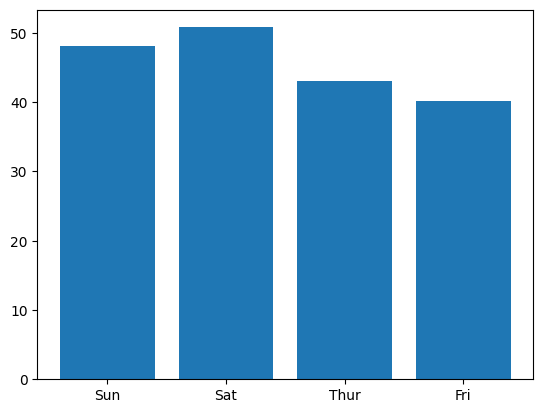

In [4]:
plt.bar(df['day'],df['total_bill'])

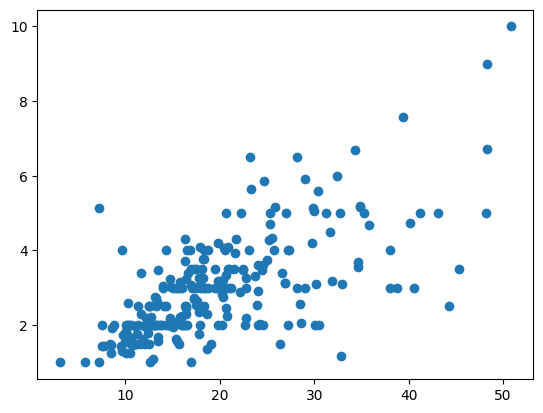

In [5]:
# dispertion plot
plt.scatter(df['total_bill'],df['tip'])

<AxesSubplot: >

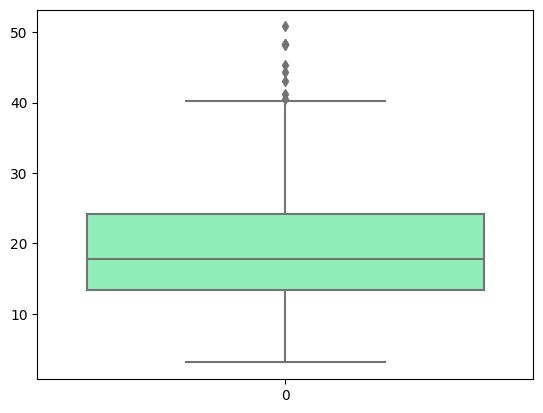

In [11]:
# # boxplot
sns.boxplot(df['total_bill'],palette='rainbow')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.DataFrame({'YearsofExperience':[1,2,3,4,5,6,7,8,9,10],'Salary':[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]})
df.head()

,YearsofExperience,Salary
0,1,10000
1,2,20000
2,3,30000
3,4,40000
4,5,50000


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['YearsofExperience']],df['Salary'],test_size=0.2,random_state=0)

In [4]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [5]:
y_pred=regressor.predict(X_test)

In [6]:
regressor.coef_

array([10000.])

In [7]:
regressor.intercept_

0.0

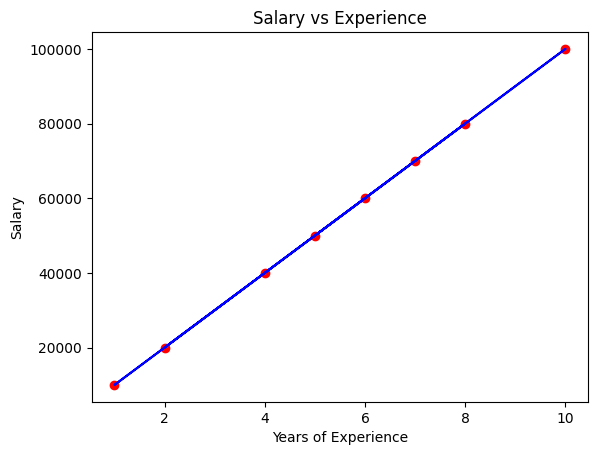

In [8]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

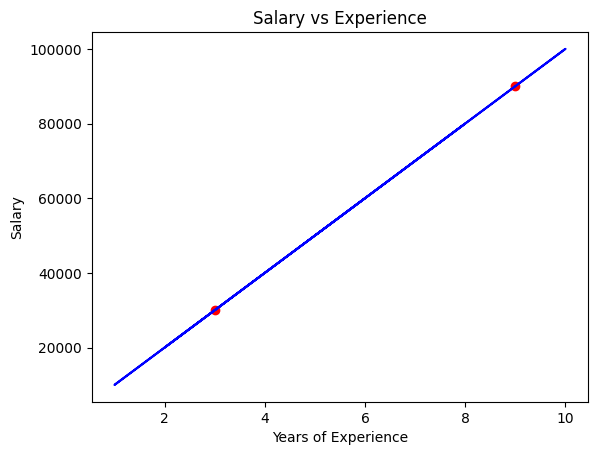

In [9]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
# sample weight is used to give more weight to some data points
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()    
regressor.fit(X_train,y_train,sample_weight=[1,1,1,1,1,1,1,1])

LinearRegression()

In [18]:
df['age']=np.random.randint(20,50,10)

In [21]:
df['distance']=np.random.randint(10,100,len(df))

In [22]:
# multiple linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(df[['age','distance']],df['Salary'])

LinearRegression()

In [23]:
regressor.coef_

array([137.01163195,  61.78234604])

In [24]:
regressor.intercept_

47247.36265927427

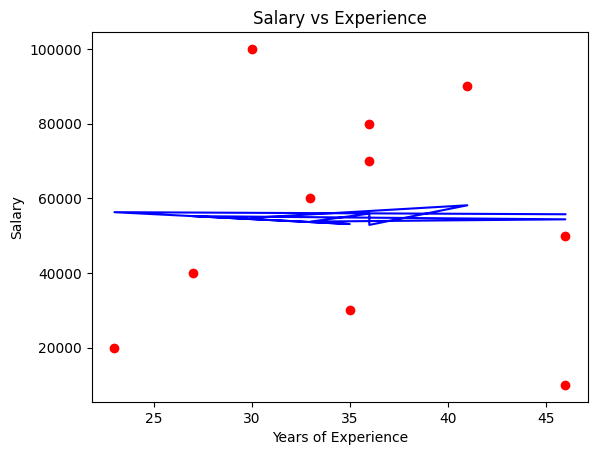

In [25]:
plt.scatter(df['age'],df['Salary'],color='red')
plt.plot(df['age'],regressor.predict(df[['age','distance']]),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# shape of the data
X_train.shape

(1070, 6)

In [15]:
# shape of the data

In [16]:
X_test.shape

(268, 6)

<AxesSubplot: >

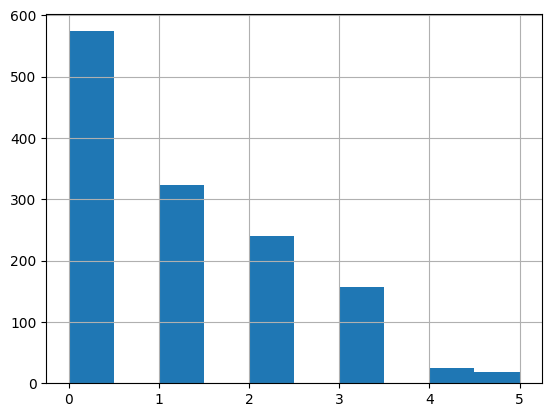

In [17]:
df['children'].hist()

In [18]:
# standization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(6,)))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
34/34 [==============================] - 0s 1ms/step - loss: 317631808.0000
Epoch 2/5
34/34 [==============================] - 0s 2ms/step - loss: 317630048.0000
Epoch 3/5
34/34 [==============================] - 0s 2ms/step - loss: 317628256.0000
Epoch 4/5
34/34 [==============================] - 0s 2ms/step - loss: 317626560.0000
Epoch 5/5
34/34 [==============================] - 0s 2ms/step - loss: 317624832.0000


In [21]:
# layers increase
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(6,)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
34/34 [==============================] - 0s 1ms/step - loss: 317634656.0000
Epoch 2/3
34/34 [==============================] - 0s 2ms/step - loss: 317625312.0000
Epoch 3/3
34/34 [==============================] - 0s 2ms/step - loss: 317615872.0000


In [22]:
# evaluation
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 342617120.0000


342617120.0

In [23]:
# save the model
model.save('model.h5')

In [24]:
# load the model
from tensorflow.keras.models import load_model
model=load_model('model.h5')

In [25]:
import pickle

In [26]:
model.load_weights('model.h5')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [28]:
digits=load_digits()

In [29]:
# shape of the data
digits.data.shape

(1797, 64)

In [30]:
# shape of the target
digits.target.shape

(1797,)

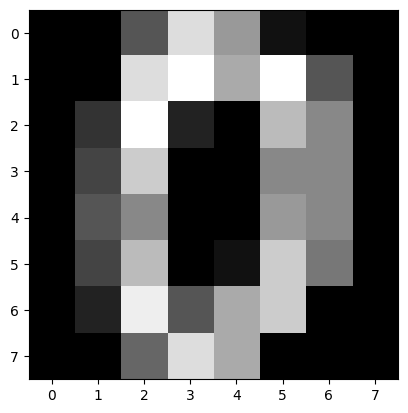

In [31]:
# display the image
plt.imshow(digits.images[0],cmap='gray')

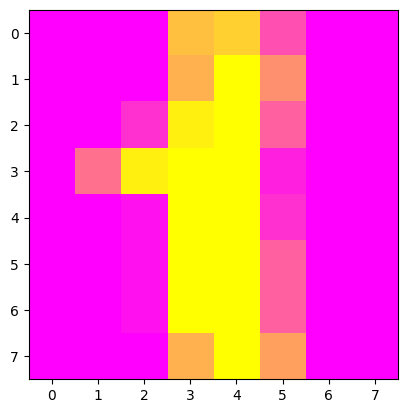

In [32]:
# display the image
plt.imshow(digits.images[1],cmap='spring')

In [33]:
X=digits.data
y=digits.target

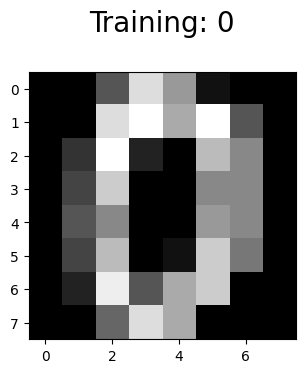

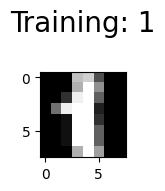

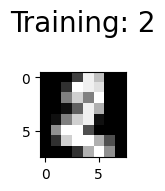

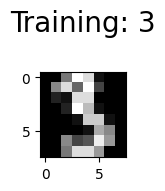

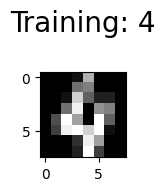

In [35]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(X[0:5],y[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap='gray')
    plt.title('Training: %i\n' % label,fontsize=20)
    plt.show()

In [36]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

In [37]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
# shape of the data
X_train.shape

(1437, 64)

In [39]:
# shape of the data
X_test.shape

(360, 64)

In [40]:
# shape of the data

In [41]:
y_train.shape

(1437,)

In [42]:
# shape of the data
y_test.shape 

(360,)

In [43]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()

In [44]:
# fit the model
logisticRegr.fit(X_train,y_train)

c:\Users\syeda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# predict the model
logisticRegr.predict(X_test[0:5])

array([2, 8, 2, 6, 6])

In [46]:
# accuracy test
logisticRegr.score(X_test,y_test)

0.9666666666666667

In [47]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,logisticRegr.predict(X_test))

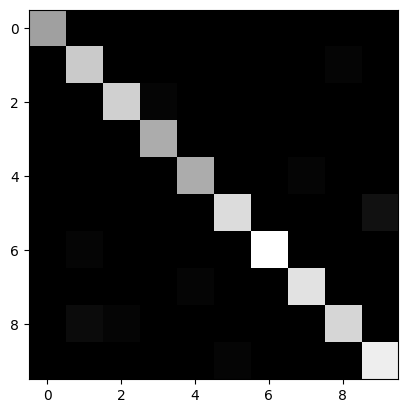

In [48]:
# display the image
plt.imshow(cm,cmap='gray')

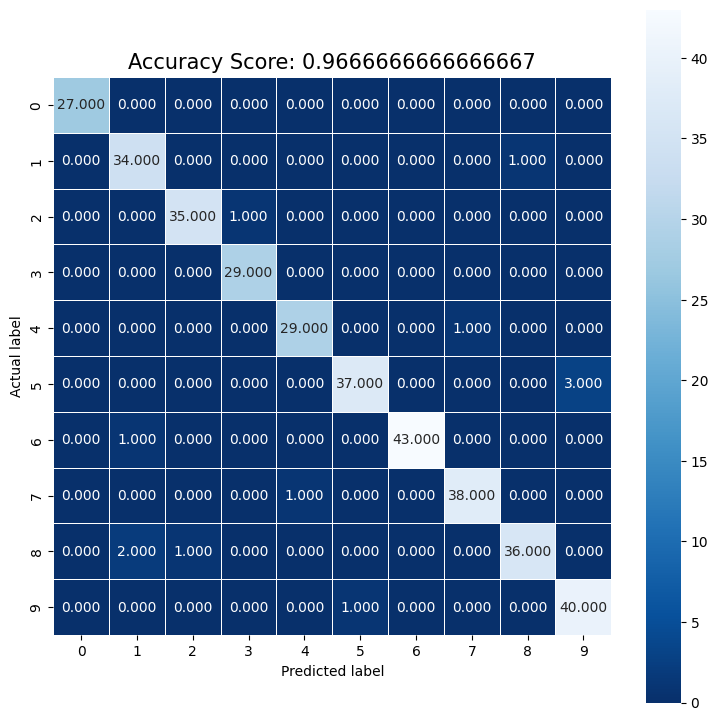

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,logisticRegr.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(logisticRegr.score(X_test,y_test))
plt.title(all_sample_title,size=15)
plt.show()

In [50]:
# misclassified images
index=0
misclassifiedIndexes=[]
for label, predict in zip(y_test,logisticRegr.predict(X_test)):
    if label!=predict:
        misclassifiedIndexes.append(index)
    index+=1
    

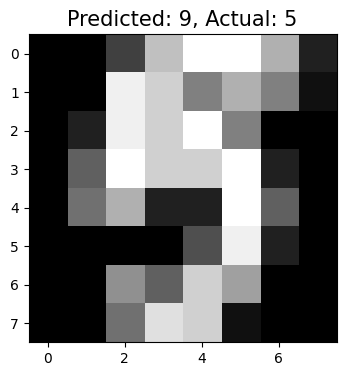

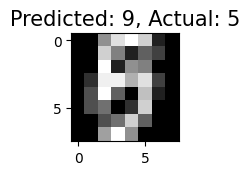

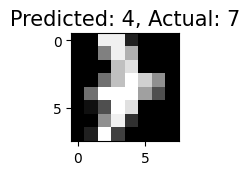

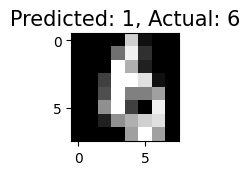

In [51]:
plt.figure(figsize=(20,4))
for plotIndex,wrong in enumerate(misclassifiedIndexes[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(logisticRegr.predict(X_test)[wrong],y_test[wrong]),fontsize=15)
    plt.show()

usage: ipykernel_launcher.py [-h] [-i] [-t] [-s]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"9e1fdd07-d7aa-47c1-8cb7-e69de8d1955e" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\syeda\AppData\Roaming\jupyter\runtime\kernel-v2-9332M8Q8hoidkvoe.json


SystemExit: 2

C:\Users\syeda\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
